# Packages

In [1]:
library(readxl)
library(car)
library(MVTests)
library(ellipse)
library(MVN)

Loading required package: carData


Attaching package: 'MVTests'


The following object is masked from 'package:datasets':

    iris



Attaching package: 'ellipse'


The following object is masked from 'package:car':

    ellipse


The following object is masked from 'package:graphics':

    pairs




# PPT

## Nomor 1

### Manual

In [2]:
Y1 <- matrix(c(3,6,5,10,10,12,14,9),4,2)
Y1

3,10
6,12
5,14
10,9


In [3]:
Y1row = nrow(Y1)
Y1col = ncol(Y1)
Y1mu = c(6,11)

Y1rep = rep(1,Y1row)
Y1bar = 1/Y1row*t(Y1)%*%Y1rep
Y1bar

6.00
11.25


In [4]:
# Matriks Kovarians
SY1 <- cov(Y1)
SY1

8.666667,-2.666667
-2.666667,4.916667


In [5]:
# T^2

T2Y1 <- Y1row*t(Y1bar-Y1mu)%*%solve(SY1)%*%(Y1bar-Y1mu)
T2Y1

0.06103286


In [6]:
# alpha = 5%; v1,v2 = 2,2
Y1Ftable = 19
c2Y1 = (Y1row-1)*Y1col/(Y1row-Y1col)*Y1Ftable
c2Y1

[1] 57

### Menggunakan Package

In [7]:
c1 <- c(3, 6, 5, 10)
c2 <- c(10, 12, 14, 9)
Y <- data.frame(c1, c2)
Y

c1,c2
<dbl>,<dbl>
3,10
6,12
5,14
10,9


Uji Ho : mean' = (6, 11) dengan taraf signifikansi alpha = 5%

In [8]:
meanH0 <- c(6, 11)
uji <- OneSampleHT2(data = Y, mu0 = meanH0, alpha = 0.05)
summary(uji)

       One Sample Hotelling T Square Test 

Hotelling T Sqaure Statistic = 0.06103286 
 F value = 0.02 , df1 = 2 , df2 = 2 , p-value: 0.98 

   	              Descriptive Statistics

           c1        c2
N     4.00000  4.000000
Means 6.00000 11.250000
Sd    2.94392  2.217356


  	            Detection important variable(s)

       Lower    Upper Mu0 Important Variables?
c1 -5.113055 17.11306   6                FALSE
c2  2.879665 19.62033  11                FALSE


## Nomor 2

### 2a

In [9]:
y1 <- c(51, 27, 37, 42, 27, 43, 41, 38, 36, 26, 29)
y2 <- c(36, 20, 22, 36, 18, 32, 22, 21, 23, 31, 20)
y3 <- c(50, 26, 41, 32, 33, 43, 36, 31, 27, 31, 25)
y4 <- c(35, 17, 37, 34, 14, 35, 25, 20, 25, 32, 26)
y5 <- c(42, 27, 30, 27, 29, 40, 38, 16, 28, 36, 25)
Y2 <- data.frame(y1, y2, y3, y4, y5)
Y2

y1,y2,y3,y4,y5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51,36,50,35,42
27,20,26,17,27
37,22,41,37,30
42,36,32,34,27
27,18,33,14,29
43,32,43,35,40
41,22,36,25,38
38,21,31,20,16
36,23,27,25,28


In [10]:
Y2mu <- c(30, 25, 40, 25, 30)
Y2test <- OneSampleHT2(data = Y2, mu0 = Y2mu, alpha = 0.05)
summary(Y2test)

       One Sample Hotelling T Square Test 

Hotelling T Sqaure Statistic = 85.3327 
 F value = 10.24 , df1 = 5 , df2 = 6 , p-value: 0.0067 

   	              Descriptive Statistics

             y1        y2        y3        y4        y5
N     11.000000 11.000000 11.000000 11.000000 11.000000
Means 36.090909 25.545455 34.090909 27.272727 30.727273
Sd     8.067894  6.787689  7.790437  7.925792  7.630084


  	            Detection important variable(s)

      Lower    Upper Mu0 Important Variables?
y1 21.38217 50.79965  30                FALSE
y2 13.17068 37.92023  25                FALSE
y3 19.88800 48.29381  40                FALSE
y4 12.82305 41.72240  25                FALSE
y5 16.81671 44.63784  30                FALSE


### 2b

#### Uji T pada y1 dengan mean = 30

In [11]:
y1test <- OneSampleHT2(data = y1, mu0 = 30, alpha = 0.05)
summary(y1test)

       One Sample Hotelling T Square Test 

Hotelling T Sqaure Statistic = 6.269553 
 F value = 6.27 , df1 = 1 , df2 = 10 , p-value: 0.0312 

   	              Descriptive Statistics

           [,1]
N     11.000000
Means 36.090909
Sd     8.067894


  	            Detection important variable(s)

     Lower    Upper Mu0 Important Variables?
1 30.67082 41.51099  30               *TRUE*


#### Uji T pada y2 dengan mean = 25

In [12]:
y2test <- OneSampleHT2(data = y2, mu0 = 25 , alpha = 0.05)
summary(y2test)

       One Sample Hotelling T Square Test 

Hotelling T Sqaure Statistic = 0.07103394 
 F value = 0.071 , df1 = 1 , df2 = 10 , p-value: 0.795 

   	              Descriptive Statistics

           [,1]
N     11.000000
Means 25.545455
Sd     6.787689


  	            Detection important variable(s)

     Lower    Upper Mu0 Important Variables?
1 20.98542 30.10549  25                FALSE


#### Uji T pada y3 dengan mean = 40

In [13]:
y3test <- OneSampleHT2(data = y3, mu0 = 40 , alpha = 0.05)
summary(y3test)

       One Sample Hotelling T Square Test 

Hotelling T Sqaure Statistic = 6.32864 
 F value = 6.329 , df1 = 1 , df2 = 10 , p-value: 0.0306 

   	              Descriptive Statistics

           [,1]
N     11.000000
Means 34.090909
Sd     7.790437


  	            Detection important variable(s)

     Lower   Upper Mu0 Important Variables?
1 28.85722 39.3246  40               *TRUE*


#### Uji T pada y4 dengan mean = 25

In [14]:
y4test <- OneSampleHT2(data = y4, mu0 = 25 , alpha = 0.05)
summary(y4test)

       One Sample Hotelling T Square Test 

Hotelling T Sqaure Statistic = 0.9044863 
 F value = 0.904 , df1 = 1 , df2 = 10 , p-value: 0.364 

   	              Descriptive Statistics

           [,1]
N     11.000000
Means 27.272727
Sd     7.925792


  	            Detection important variable(s)

     Lower    Upper Mu0 Important Variables?
1 21.94811 32.59735  25                FALSE


#### Uji T pada y5 dengan mean = 30

In [15]:
y5test <- OneSampleHT2(data = y5, mu0 = 30 , alpha = 0.05)
summary(y5test)

       One Sample Hotelling T Square Test 

Hotelling T Sqaure Statistic = 0.09993754 
 F value = 0.1 , df1 = 1 , df2 = 10 , p-value: 0.758 

   	              Descriptive Statistics

           [,1]
N     11.000000
Means 30.727273
Sd     7.630084


  	            Detection important variable(s)

     Lower    Upper Mu0 Important Variables?
1 25.60131 35.85323  30                FALSE


# Modul

In [16]:
Y3 <- read_excel("Tugas4_APG.xlsx")
Y3

X1_SocSciHist,X2_Verbal,X3_Science
<dbl>,<dbl>,<dbl>
468,41,26
428,39,26
514,53,21
547,67,33
614,61,27
501,67,29
421,46,22
527,50,23
527,55,19


## A

In [17]:
Y3mu <- c(500, 50, 30)
Y3test <- OneSampleHT2(data = Y3, mu0 = Y3mu, alpha = 0.05)
summary(Y3test)

       One Sample Hotelling T Square Test 

Hotelling T Sqaure Statistic = 223.3102 
 F value = 72.706 , df1 = 3 , df2 = 84 , p-value: <2e-16 

   	              Descriptive Statistics

      X1_SocSciHist X2_Verbal X3_Science
N          87.00000  87.00000  87.000000
Means     526.58621  54.68966  25.126437
Sd         76.21062  11.22737   4.807467


  	            Detection important variable(s)

                  Lower     Upper Mu0 Important Variables?
X1_SocSciHist 502.99940 550.17302 500               *TRUE*
X2_Verbal      51.21484  58.16447  50               *TRUE*
X3_Science     23.63855  26.61432  30               *TRUE*


## B

### untuk μ-verbal dan μ-science

In [18]:
n <- nrow(Y3)
p <- ncol(Y3)
xbar <- colMeans(Y3)
S <- cov(Y3)
alpha<-0.05
tconst <- sqrt((p/n)*((n-1)/(n-p)) * qf(1-alpha,p,n-p))
id <- c(2,3)

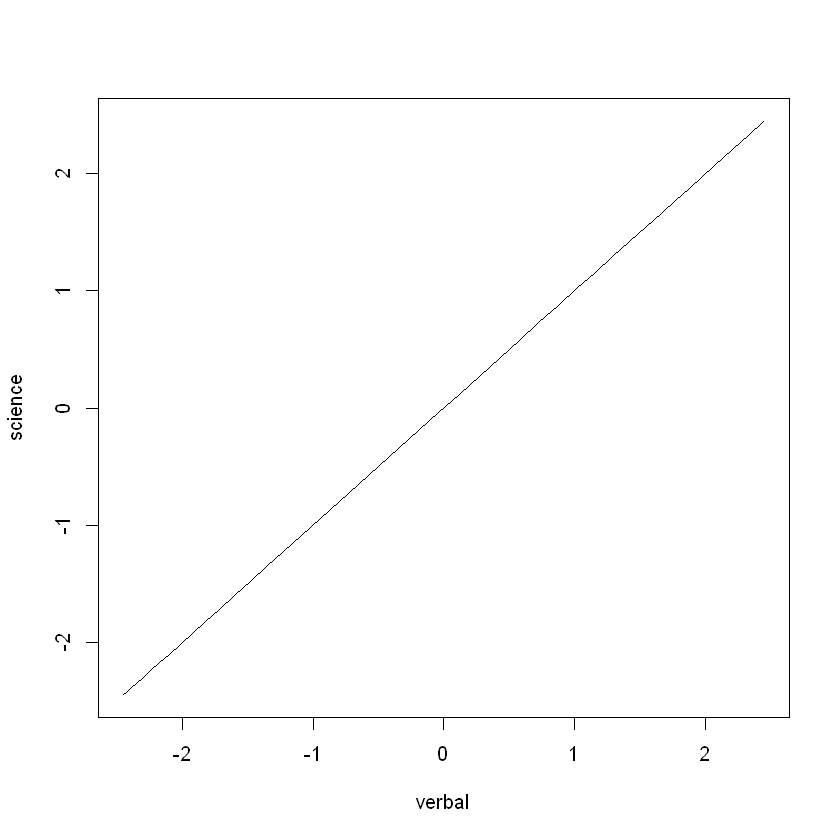

In [19]:
plot(ellipse(Y3,
             center=xbar[id],
             shape=S[id,id],
             radius=tconst,
             draw=F),
     type ="n",
     xlab="verbal",
     ylab="science")
lines(ellipse(Y3,
              center=xbar[id],
              shape=S[id,id],
              radius=tconst,
              lwd=3),
      xlab ="verbal",
      ylab="science")
points(20,200,col="red", pch=16)
text(20.5,200,expression(mu[0]))
text(xbar[2]+0.5,xbar[3],expression(bar(x))) 

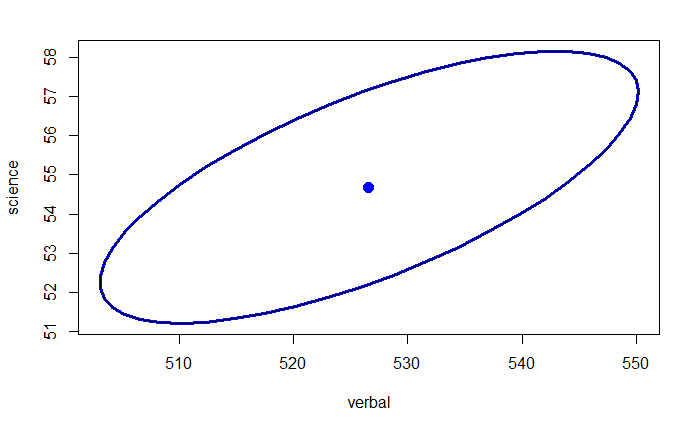

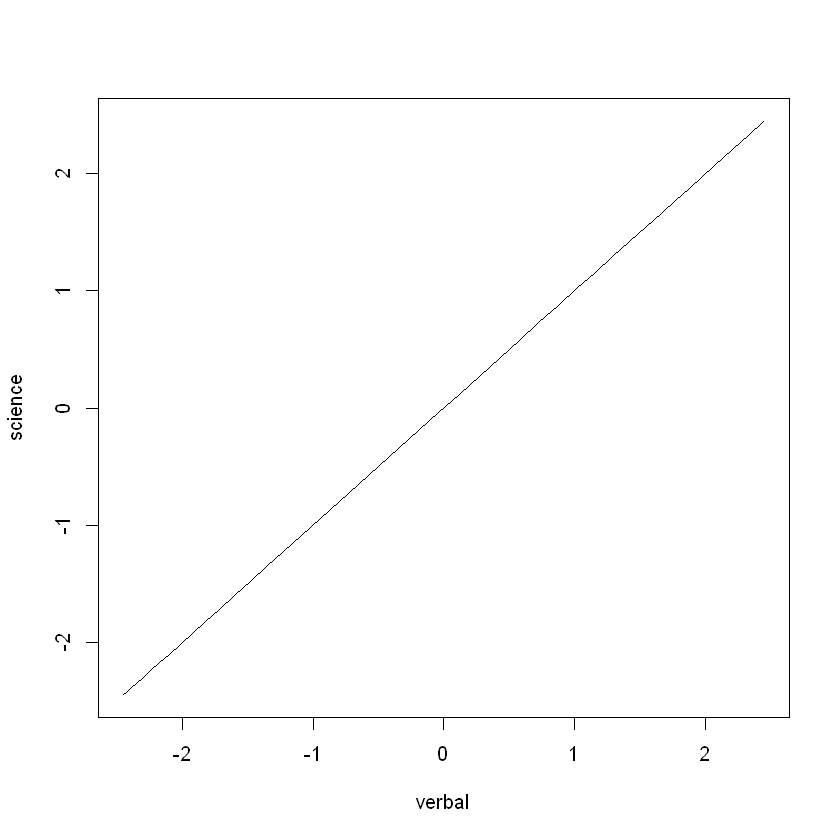

In [20]:
plot(ellipse(Y3,
             center=xbar[id],
             shape=S[id,id],
             radius=tconst,
             draw=F),
     type ="n",
     xlab="verbal",
     ylab="science")
lines(ellipse(Y3,
              center=xbar[id],
              shape=S[id,id],
              radius=tconst,
              lwd=3),
      xlab ="verbal",
      ylab="science")
points(50,500,col="red", pch=16)
text(50.5,500,expression(mu[0])) 
text(xbar[1]+0.5,xbar[2],expression(bar(x)))

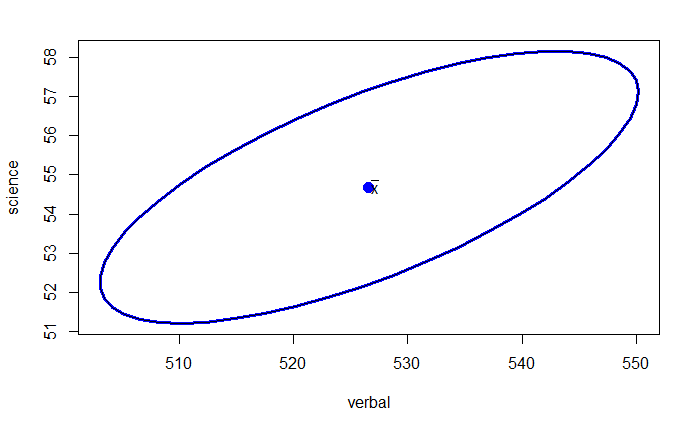

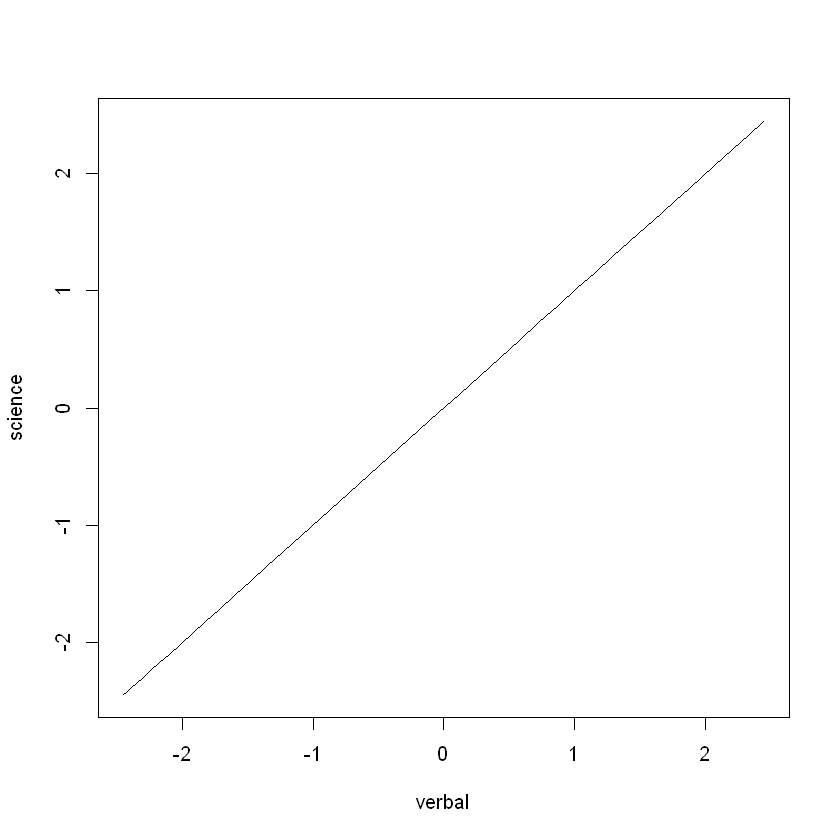

In [21]:
plot(ellipse(Y3,
             center=xbar[id],
             shape=S[id,id],
             radius=tconst,
             draw=F),
     type ="n",
     xlab="verbal",
     ylab="science")
lines(ellipse(Y3,
              center=xbar[id],
              shape=S[id,id],
              radius=tconst,
              lwd=3),
      xlab ="verbal",
      ylab="science")
points(50,500,col="red", pch=16)
text(50.5,500,expression(mu[0])) 
text(xbar[1]+0.5,xbar[3],expression(bar(x)))

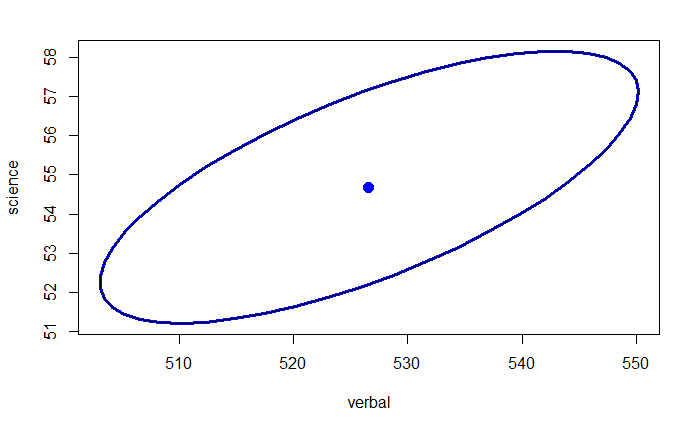

## C

### CI Sampel Kecil : Uji Hotelling T 

In [22]:
summary(Y3test)

       One Sample Hotelling T Square Test 

Hotelling T Sqaure Statistic = 223.3102 
 F value = 72.706 , df1 = 3 , df2 = 84 , p-value: <2e-16 

   	              Descriptive Statistics

      X1_SocSciHist X2_Verbal X3_Science
N          87.00000  87.00000  87.000000
Means     526.58621  54.68966  25.126437
Sd         76.21062  11.22737   4.807467


  	            Detection important variable(s)

                  Lower     Upper Mu0 Important Variables?
X1_SocSciHist 502.99940 550.17302 500               *TRUE*
X2_Verbal      51.21484  58.16447  50               *TRUE*
X3_Science     23.63855  26.61432  30               *TRUE*


### CI Sampel Besar : Uji Chi-Square

In [23]:
chi <- NULL
for(k in 1:3)
{
    avec <- rep(0, 2)
    avec[k] <- 1
    chi <- c(chi, xbar[k] - sqrt(S[k,k]/n) * sqrt(qchisq(0.95, df=p)), xbar[k] + sqrt(S[k,k]/n) * sqrt(qchisq(0.95, df=p)))
}
rtab <- rbind(chi)
round(rtab, 2)

,X1_SocSciHist,X1_SocSciHist,X2_Verbal,X2_Verbal,X3_Science,X3_Science
chi,503.75,549.43,51.32,58.05,23.69,26.57


## D

### a. QQ-Plot

$X1_SocSciHist
NULL

$X2_Verbal
NULL

$X3_Science
NULL

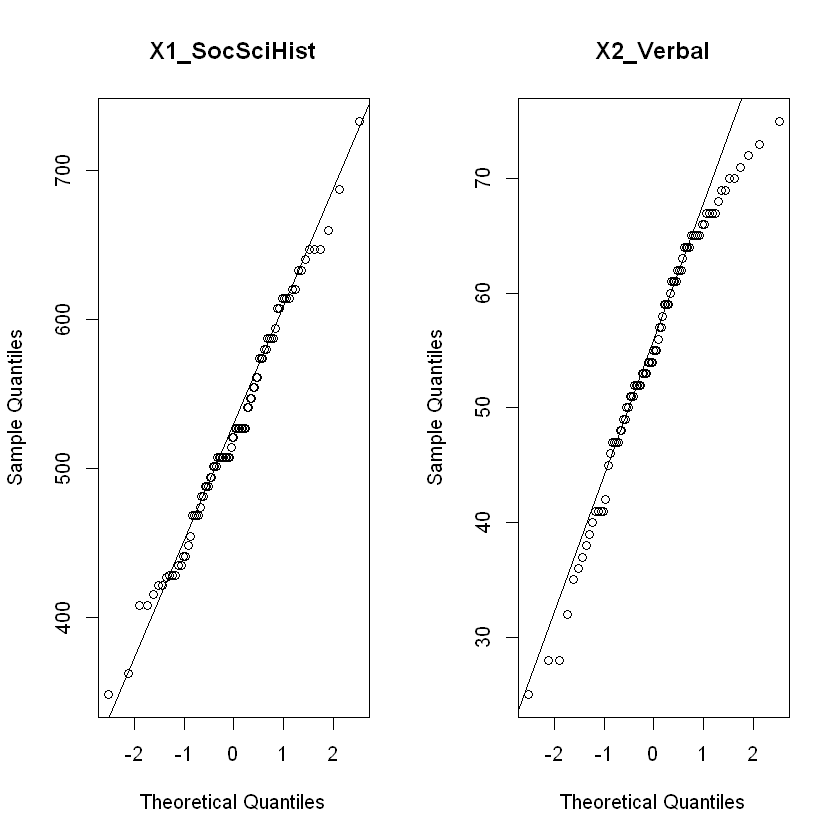

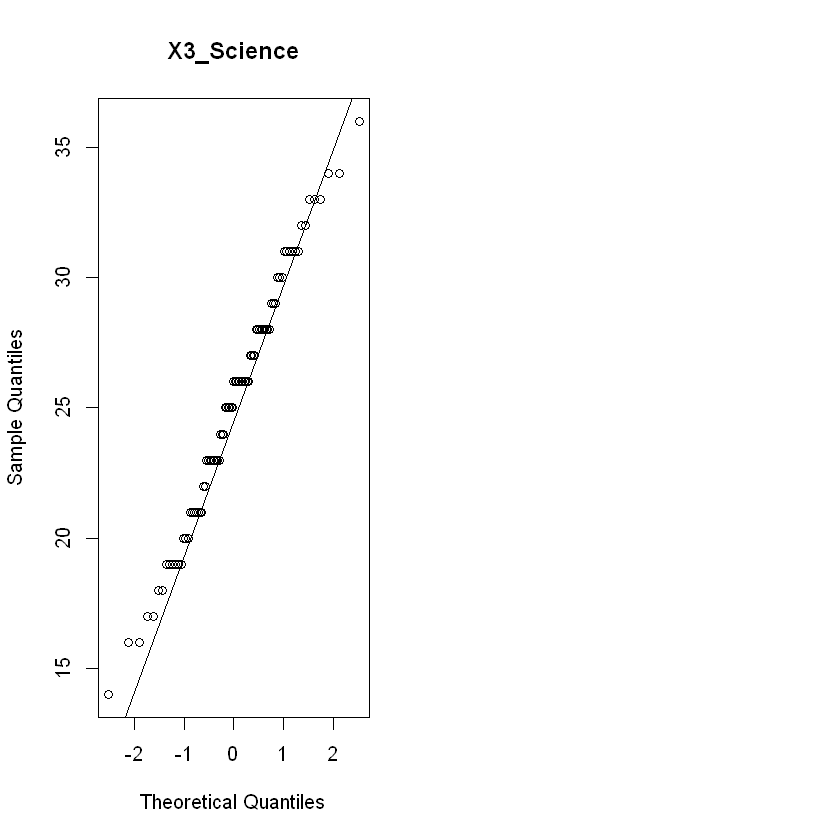

In [24]:
x <- Y3
layout(matrix(1:2, nc = 2))
sapply(colnames(Y3), function(x) {
    qqnorm(Y3[[x]], main = x)
    qqline(Y3[[x]]) })

### Bivariate Scatter Plot

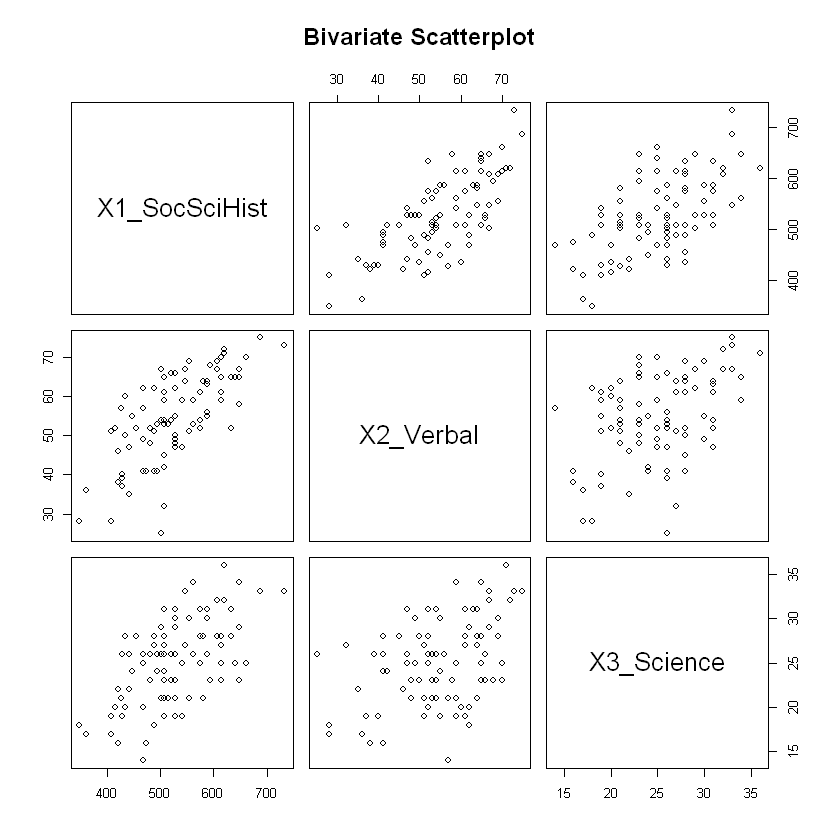

In [25]:
pairs(Y3, main="Bivariate Scatterplot")

### Chi-square Plot

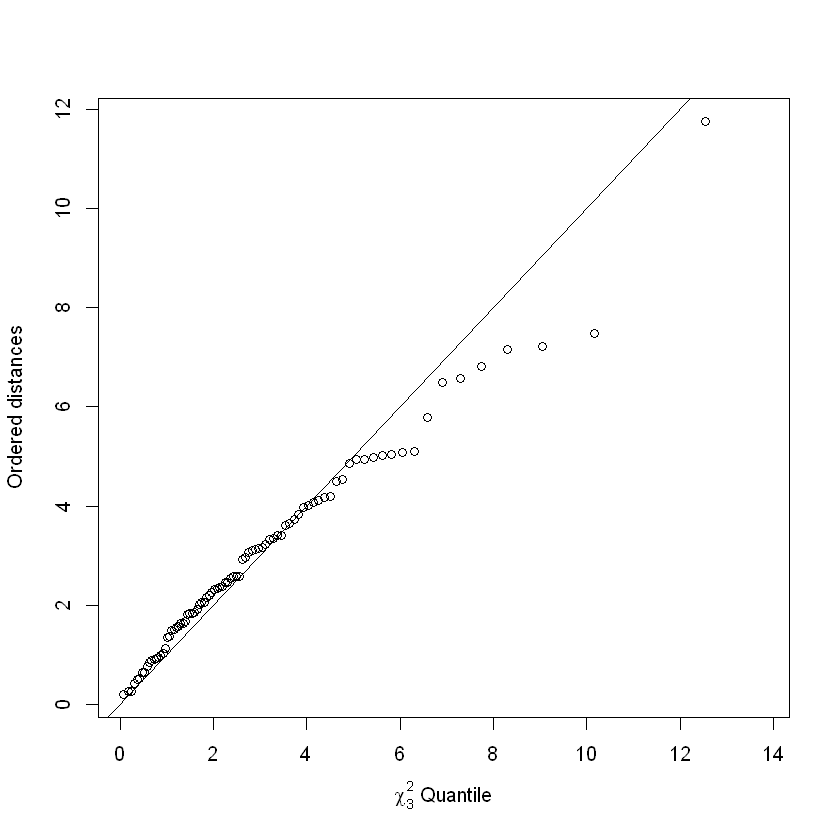

In [26]:
cm <- colMeans(x)
S <- cov(x)
d <- apply(x, 1, function(x) t(x - cm) %*% solve(S) %*% (x - cm))
plot(qc <- qchisq((1:nrow(x) - 1/2) / nrow(x), df = 3),
 sd <- sort(d),
 xlab = expression(paste(chi[3]^2, " Quantile")),
 ylab = "Ordered distances", xlim = range(qc) * c(1, 1.1))
oups <- which(rank(abs(qc - sd), ties = "random") > nrow(x) - 3)
text(qc[oups], sd[oups] - 1.5, names(oups))
abline(a = 0, b = 1)

## E

### Uji Multivariat Normal pada data The College Data asli


In [27]:
# Henze Zirkler Test
mvn(data = Y3[, c(1,2,3)], multivariatePlot = 'plot', showOutlier = TRUE)

$multivariateNormality
           Test        HZ   p value MVN
1 Henze-Zirkler 0.6165509 0.7235498 YES

$univariateNormality
              Test      Variable Statistic   p value Normality
1 Anderson-Darling X1_SocSciHist    0.3890    0.3775    YES   
2 Anderson-Darling   X2_Verbal      0.6931    0.0679    YES   
3 Anderson-Darling  X3_Science      0.3890    0.3775    YES   

$Descriptives
               n      Mean   Std.Dev Median Min Max  25th  75th        Skew
X1_SocSciHist 87 526.58621 76.210625    521 348 733 477.5 583.5  0.14152904
X2_Verbal     87  54.68966 11.227365     55  25  75  48.0  64.0 -0.50839767
X3_Science    87  25.12644  4.807467     26  14  36  21.0  28.0 -0.03528656
                Kurtosis
X1_SocSciHist -0.3603633
X2_Verbal     -0.3117746
X3_Science    -0.6637848

$multivariateOutliers
NULL

### Uji Multivariat Normal pada data The College Data yang dibuang outliernya

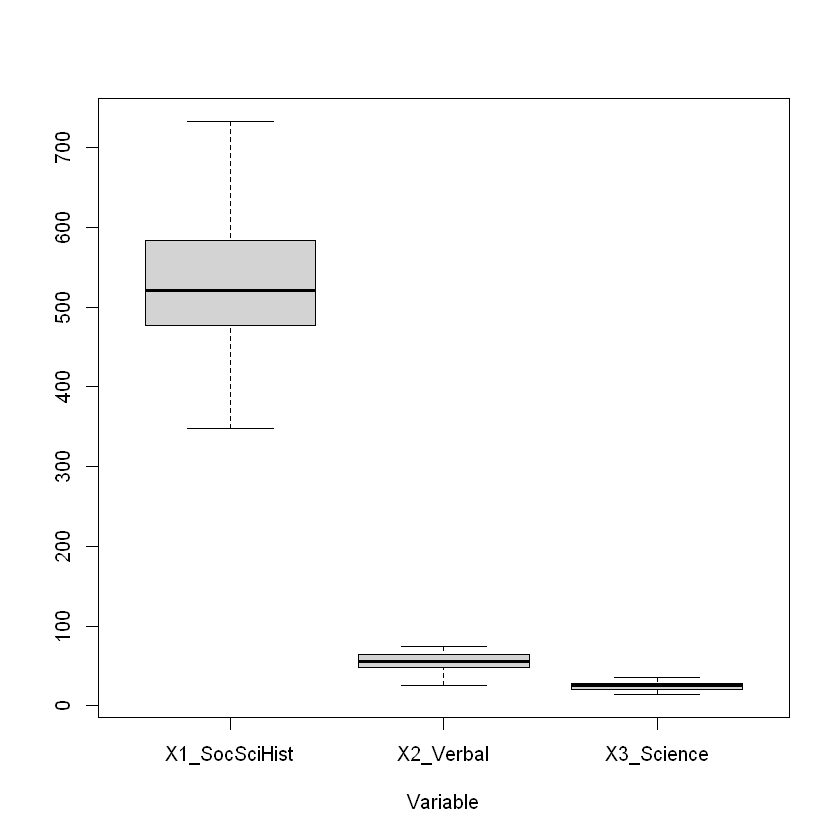

In [28]:
# Cek variabel yang memiliki outlier lewat boxplot
boxplot(Y3, xlab = "Variable")